In [52]:
from typing import Optional

import pytest
import torch
from jaxtyping import Float, Int
from torch import Tensor
import tqdm

from gsplat import project_gaussians

device = torch.device("cuda:0")

torch.manual_seed(42)

N: int = 1000
D: int = 3
profile: bool = False


means3d = torch.rand((N, 3), device=device, requires_grad=False)
means3d[:, :3] *= 5.0
scales = torch.rand((N, 3), device=device) 
scales[:, 2] = 0.01 # surfels!

quats = torch.randn((N, 4), device=device)
quats /= torch.linalg.norm(quats, dim=-1, keepdim=True)

opacities = torch.ones((N, 1), device=device)

rgbs = torch.rand((N, D), device=device)
background = torch.zeros(D, device=device)

viewmat = projmat = torch.eye(4, device=device)
fx = fy = 3.0
H, W = 256, 384
#BLOCK_X = BLOCK_Y = 16
#tile_bounds = (W + BLOCK_X - 1) // BLOCK_X, (H + BLOCK_Y - 1) // BLOCK_Y, 1
block_width=8

xys, depths, radii, conics, compensation, num_tiles_hit, cov3d = project_gaussians(
    means3d,
    scales,
    1,
    quats,
    viewmat,
    fx,
    fy,
    W / 2,
    H / 2,
    H,
    W,
    block_width,
)

In [53]:
from test_rasterize_surfels import _rasterize_surfels_using_indicies, _rasterize_surfels_using_surfel_indicies

In [54]:
from gsplat import rasterize_gaussians

In [55]:
from matplotlib import pyplot as plt

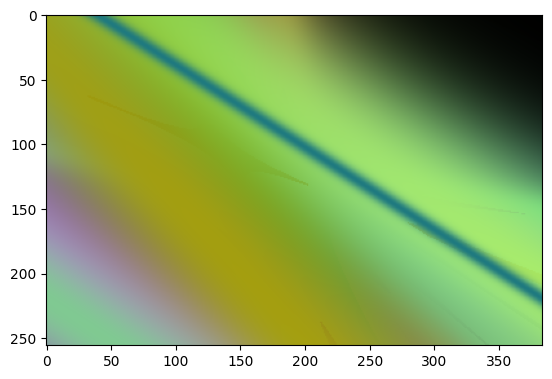

In [56]:
img = rasterize_gaussians(
            xys, depths, radii, conics, num_tiles_hit, rgbs, opacities, H, W, block_width, background
)
plt.imshow(img.cpu().numpy())

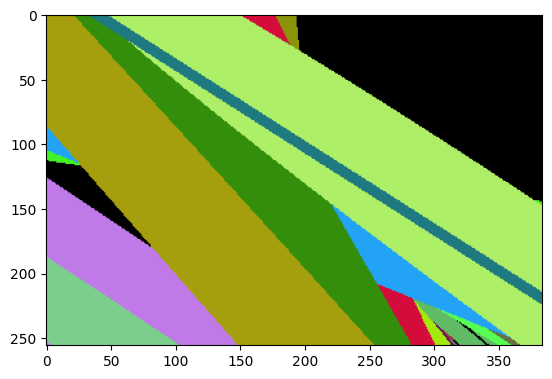

In [57]:
img =_rasterize_surfels_using_indicies(
            xys, depths, radii, conics, num_tiles_hit, rgbs, opacities, H, W, block_width, background
)
plt.imshow(img.cpu().numpy())

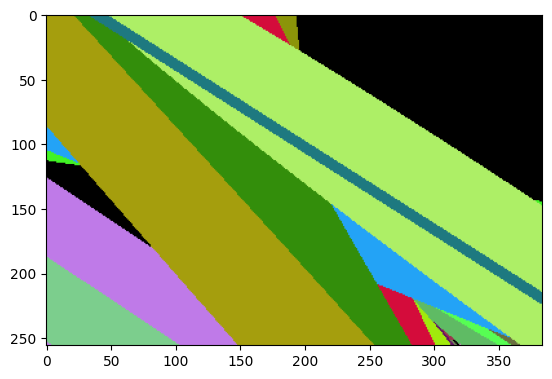

In [58]:
img =_rasterize_surfels_using_surfel_indicies(
            xys, depths, radii, conics, num_tiles_hit, rgbs, opacities, H, W, block_width, background
)
plt.imshow(img.cpu().numpy())